# KNN
Adapted from https://www.pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from imutils import paths
import numpy as np
import imutils
import cv2
import os
from sklearn.metrics import classification_report, confusion_matrix 

## Preparing the data

In [2]:
# flatten the image into a list of raw pixel intensities
def image_to_feature_vector(image):
	return image.flatten()
 
# extract a 3D color histogram from the HSV color space using the supplied number of `bins` per channel 
def extract_color_histogram(image, bins=(8, 8, 8)):
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
	cv2.normalize(hist, hist) # normalizing the histogram 
	return hist.flatten() # return the flattened histogram as the feature vector

In [3]:
# grab the list of images that we'll be describing (Add your directory here)
print("[INFO] describing images...")
trainimagePaths = list(paths.list_images('C:/Users/seeyo/Downloads/Symbols/train'))
# initialize the raw pixel intensities matrix, the features matrix, and labels list
train=[]
trainrawImages = []
trainfeatures = []
trainlabels = []

# grab the list of images that we'll be describing (Add your directory here)
print("[INFO] describing images...")
validimagePaths = list(paths.list_images('C:/Users/seeyo/Downloads/Symbols/valid'))
# initialize the raw pixel intensities matrix, the features matrix, and labels list
valid = []
validrawImages = []
validfeatures = []
validlabels = []

# grab the list of images that we'll be describing (Add your directory here)
print("[INFO] describing images...")
testimagePaths = list(paths.list_images('C:/Users/seeyo/Downloads/Symbols/test'))
# initialize the raw pixel intensities matrix, the features matrix, and labels list
test = []
testrawImages = []
testfeatures = []
testlabels = []

[INFO] describing images...
[INFO] describing images...
[INFO] describing images...


### Train

In [4]:
for (i, imagePath) in enumerate(trainimagePaths):
	# load the image and extract the class label (assuming that our path as the format: /path/to/dataset/{class}.{image_num}.jpg
	image = cv2.imread(imagePath)
	label = imagePath.split(os.path.sep)[-2].split(".")[0]

    # extract raw pixel intensity "features", followed by a color histogram to characterize the color distribution of the pixels in the image
	pixels = image_to_feature_vector(image)
	hist = extract_color_histogram(image)
 
	# update the raw images, features, and labels matricies, respectively
	trainrawImages.append(pixels)
	trainfeatures.append(hist)
	trainlabels.append(label)
	train.append(image)
	# show an update every 1,000 images
	if i > 0 and i % 1000 == 0:
		print("[INFO] processed {}/{}".format(i, len(trainimagePaths)))

[INFO] processed 1000/26925
[INFO] processed 2000/26925
[INFO] processed 3000/26925
[INFO] processed 4000/26925
[INFO] processed 5000/26925
[INFO] processed 6000/26925
[INFO] processed 7000/26925
[INFO] processed 8000/26925
[INFO] processed 9000/26925
[INFO] processed 10000/26925
[INFO] processed 11000/26925
[INFO] processed 12000/26925
[INFO] processed 13000/26925
[INFO] processed 14000/26925
[INFO] processed 15000/26925
[INFO] processed 16000/26925
[INFO] processed 17000/26925
[INFO] processed 18000/26925
[INFO] processed 19000/26925
[INFO] processed 20000/26925
[INFO] processed 21000/26925
[INFO] processed 22000/26925
[INFO] processed 23000/26925
[INFO] processed 24000/26925
[INFO] processed 25000/26925
[INFO] processed 26000/26925


### Valid

In [5]:
for (i, imagePath) in enumerate(validimagePaths):
	# load the image and extract the class label (assuming that our path as the format: /path/to/dataset/{class}.{image_num}.jpg
	image = cv2.imread(imagePath)
	label = imagePath.split(os.path.sep)[-2].split(".")[0]

	# extract raw pixel intensity "features", followed by a color histogram to characterize the color distribution of the pixels in the image
	pixels = image_to_feature_vector(image)
	hist = extract_color_histogram(image)
 
	# update the raw images, features, and labels matricies, respectively
	validrawImages.append(pixels)
	validfeatures.append(hist)
	validlabels.append(label)
	valid.append(image)
	# show an update every 1,000 images
	if i > 0 and i % 1000 == 0:
		print("[INFO] processed {}/{}".format(i, len(validimagePaths)))

[INFO] processed 1000/11540
[INFO] processed 2000/11540
[INFO] processed 3000/11540
[INFO] processed 4000/11540
[INFO] processed 5000/11540
[INFO] processed 6000/11540
[INFO] processed 7000/11540
[INFO] processed 8000/11540
[INFO] processed 9000/11540
[INFO] processed 10000/11540
[INFO] processed 11000/11540


### Test

In [6]:
for (i, imagePath) in enumerate(testimagePaths):
	# load the image and extract the class label (assuming that our path as the format: /path/to/dataset/{class}.{image_num}.jpg
	image = cv2.imread(imagePath)
	label = imagePath.split(os.path.sep)[-2].split(".")[0]

	# extract raw pixel intensity "features", followed by a color histogram to characterize the color distribution of the pixels in the image
	pixels = image_to_feature_vector(image)
	hist = extract_color_histogram(image)
 
	# update the raw images, features, and labels matricies, respectively
	testrawImages.append(pixels)
	testfeatures.append(hist)
	testlabels.append(label)
	test.append(image)
	# show an update every 1,000 images
	if i > 0 and i % 1000 == 0:
		print("[INFO] processed {}/{}".format(i, len(testimagePaths)))

[INFO] processed 1000/5082
[INFO] processed 2000/5082
[INFO] processed 3000/5082
[INFO] processed 4000/5082
[INFO] processed 5000/5082


### Memory space

In [7]:
# show some information on the memory consumed by the raw images
# matrix and features matrix
trainrawImages = np.array(trainrawImages)
trainfeatures = np.array(trainfeatures)
trainlabels = np.array(trainlabels)

validrawImages = np.array(validrawImages)
validfeatures = np.array(validfeatures)
validlabels = np.array(validlabels)

print("[INFO] pixels matrix: {:.2f}MB".format(trainrawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(trainfeatures.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 159.74MB
[INFO] features matrix: 53.85MB


## Train on raw images

Hyperparameter here! change n_neighbors to vary between 3, 15, 30, 45, and 60

In [32]:
# train and evaluate a k-NN classifer on the raw pixel intensities
print("[INFO] Raw pixel accuracy...")
knn_rawmodel = KNeighborsClassifier(n_neighbors=60) # Change this
knn_rawmodel.fit(trainrawImages, trainlabels)
acc = knn_rawmodel.score(validrawImages, validlabels)
print("[INFO] raw pixel valid accuracy: {:.2f}%".format(acc * 100))

valid_rawpred = knn_rawmodel.predict(validrawImages)
# valid_rawpred

[INFO] Raw pixel accuracy...
[INFO] raw pixel valid accuracy: 8.31%


In [33]:
acc = knn_rawmodel.score(testrawImages, testlabels)
print("[INFO] raw pixel test accuracy: {:.2f}%".format(acc * 100))

test_rawpred = knn_rawmodel.predict(testrawImages)
# test_rawpred

[INFO] raw pixel test accuracy: 8.62%


In [34]:
print(confusion_matrix(testlabels,test_rawpred))
print(classification_report(testlabels,test_rawpred))#Output

[[ 7  0  0 ...  0  0  0]
 [ 4 99  0 ...  0  0  0]
 [ 0  0 99 ...  0  0  0]
 ...
 [ 8  2  1 ...  0  0  0]
 [ 8  1  0 ...  0  0  0]
 [ 7  0  2 ...  0  0  0]]
              precision    recall  f1-score   support

           !       0.02      0.47      0.04        15
           (       0.42      0.71      0.53       140
           )       0.39      0.71      0.50       140
           +       0.00      0.00      0.00       140
           -       0.45      0.81      0.58       140
           0       0.00      0.00      0.00       140
           1       0.33      0.41      0.37       140
           2       0.00      0.00      0.00       140
           3       0.00      0.00      0.00       140
           4       0.00      0.00      0.00       140
           5       0.00      0.00      0.00       124
           6       0.00      0.00      0.00        95
           7       0.00      0.00      0.00       106
           8       0.00      0.00      0.00        89
           9       0.00      0.00

C:\Users\seeyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\seeyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\seeyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Train on histogram

Hyperparameter here! change n_neighbors to vary between 3, 15, 30, 45, and 60

In [35]:
# train and evaluate a k-NN classifer on the histogram
# representations
print("[INFO] Histogram accuracy...")
knn_histmodel = KNeighborsClassifier(n_neighbors=60) # Change this
knn_histmodel.fit(trainfeatures, trainlabels)
acc = knn_histmodel.score(validfeatures, validlabels)
print("[INFO] histogram valid accuracy: {:.2f}%".format(acc * 100))

# valid_histpred = knn_histmodel.predict(validfeatures)

[INFO] Histogram accuracy...
[INFO] histogram valid accuracy: 9.98%


In [36]:
acc = knn_histmodel.score(testfeatures, testlabels)
print("[INFO] histogram test accuracy: {:.2f}%".format(acc * 100))
test_histpred = knn_histmodel.predict(testfeatures)
# test_histpred

[INFO] histogram test accuracy: 10.17%


In [37]:
print(confusion_matrix(testlabels,test_histpred))
print(classification_report(testlabels,test_histpred))

[[ 7  1  0 ...  0  0  0]
 [ 0 54 13 ...  0  0  0]
 [ 0 37 17 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  1  2 ...  0  0  0]
 [ 0  4  1 ...  0  0  0]]
              precision    recall  f1-score   support

           !       0.17      0.47      0.25        15
           (       0.33      0.39      0.35       140
           )       0.29      0.12      0.17       140
           +       0.07      0.18      0.11       140
           -       0.36      0.85      0.51       140
           0       0.08      0.10      0.09       140
           1       0.04      0.01      0.02       140
           2       0.00      0.00      0.00       140
           3       0.07      0.13      0.09       140
           4       0.05      0.11      0.07       140
           5       0.00      0.00      0.00       124
           6       0.02      0.04      0.03        95
           7       0.04      0.03      0.03       106
           8       0.05      0.12      0.07        89
           9       0.03      0.06

C:\Users\seeyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\seeyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\seeyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM  
Hyperparameters
* Gamma
* C (small c: cost of misclassification low, large: cost of misclassification high)
* Kernel (linear, RBF, polynomial)

In [8]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import classifiers and performance metrics
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV

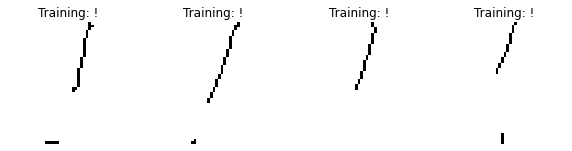

In [9]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, train, trainlabels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %s' % label)

In [10]:
param_grid={'C':[0.1],'gamma':[0.0001],'kernel':['rbf']}
svc=svm.SVC(probability=True)
svm_model=GridSearchCV(svc,param_grid)

## Train on raw images

In [ ]:
svm_model.fit(trainrawImages, trainlabels)
svm_model.best_params_

In [ ]:
valid_pred=svm_model.predict(validrawImages)
print(f"The SVM model on valid set is {accuracy_score(valid_pred,validlabels)*100}% accurate")

In [ ]:
test_pred=svm_model.predict(testrawImages)
print("The predicted Data is :")
# print(test_pred)
print("\nThe actual data is:")
# print(np.array(testlabels))
print(f"The SVM model on test set is {accuracy_score(test_pred,testlabels)*100}% accurate")

In [ ]:
print(confusion_matrix(testlabels,test_pred))
print(classification_report(testlabels,test_pred))#Output